#                   Experiments for Regression using Boston Housing Dataset (Multivariate)

A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass.

There are 14 attributes in each case of the dataset and 506 datapoints.
<br>CRIM - per capita crime rate by town 
<br>ZN - proportion of residential land zoned for lots over 25,000 sq.ft;
<br>INDUS - proportion of non-retail business acres per town.
<br>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
<br>NOX - nitric oxides concentration (parts per 10 million)
<br>RM - average number of rooms per dwelling
<br>AGE - proportion of owner-occupied units built prior to 1940
<br>DIS - weighted distances to five Boston employment centres
<br>RAD - index of accessibility to radial highways
<br>TAX - full-value property-tax rate per 10,000 USD
<br>PTRATIO - pupil-teacher ratio by town
<br>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
<br>LSTAT - % lower status of the population
<br>MEDV - Median value of owner-occupied homes in 1000 USD (TARGET)


In [1]:
#Utilities
import numpy as np 

def rademacher_variables(vec_size):
    if vec_size % 2 != 0:
        return("Error, vector size should be even.")
    s = np.random.binomial(1,0.5, vec_size)
    a = sum(s)
    while a.all() !=0:
        s = np.random.binomial(1,0.5, vec_size)
        s[s < 1] = -1
        a = sum(s)
    return(s)
      
def rademacher_bound(array_x, delta, train_error, array_Rademacher):
    c =3*(np.sqrt(np.log(2/delta))/(2*(array_x)))
    bound = np.add(train_error, array_Rademacher)
    bound = np.add(bound,c)
    return(bound)

def vc_dimension_regression(array_x, array_Rademacher):
    c = array_x/(2*np.log(array_x))
    VC = (array_Rademacher**2)*c
    return(VC)

def VC_bound(array_x, train_error, array_VCdim, delta):
    a = array_VCdim/array_x #VC/#samples
    b = np.log(array_x/array_VCdim)
    c = np.log(delta/4)
    VCbound = train_error/abs((1-0.1*np.sqrt(a+a*b-c)))
    return(VCbound)

### Experiment 1:  Evaluating how train and test error varies with increasing training set size.

<br>Empirical train and test error: Root Mean Squared Error 
<br>Theoretical Bounds: Rademacher and VC Bounds for Regression 

Hyperparameters: 
<br>Test Samples = 50
<br>Train Samples = [6,16,32,42,....,196]
<br>We run each sample size 100 times and take the average for calculating the empirical erros to reduce noise. 


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.datasets import load_boston
from random import sample

n = range(6,200, 10)
n_2 = range(0,100,1)

test_error = []
train_error = []
temp_test = []
temp_train = []
temp_L = []
Rad = []

#Test set
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)
X, X_test, Y, Y_test = train_test_split(df_x, df_y, test_size = 0.1)


for counter,value in enumerate(n): 
    for j in n_2:
        #step 1 - train set
        idx = sample(range(0,len(X)), value)
        X_train = X.iloc[idx]
        Y_train = Y.iloc[idx]
     
        Y_pred_train = np.empty_like(Y_train)
        Y_pred_test = np.empty_like(Y_test)
    
        #rademacher sigma
        s = rademacher_variables(len(Y_train))

        #Step 2: model fitting
        #initialisation of linear regression model
        m = LinearRegression()

        #inserting train data into model for training
        m.fit(X_train,Y_train)

        #predicting values for test data
        Y_pred_test = m.predict(X_test)
        Y_pred_train = m.predict(X_train)

        #computing RMSE
        error_test= np.sqrt(mean_squared_error(Y_test, Y_pred_test))
        temp_test.append(error_test)

        error_train= np.sqrt(mean_squared_error(Y_train, Y_pred_train))
        temp_train.append(error_train)

         #Rademacher constant      
        temp_L.append(float(2*(np.dot(s, np.sqrt((Y_train-Y_pred_train)**2))/len(Y_train))))
    
    test_error.append(sum(temp_test)/len(temp_test))
    train_error.append(sum(temp_train)/len(temp_train))
    Rad.append((max(temp_L)))
    temp_test.clear()
    temp_train.clear()
    temp_L.clear()

#Calculating Rademacher and VC Bounds
print("Rademacher Constant")
print(Rad)
radBound = rademacher_bound(np.array(n), 0.1, np.array(train_error), np.array(Rad))
print("Rademacher Bound")
print(radBound)
VCdim = vc_dimension_regression(np.array(n), np.array(Rad))
print("VC Dimension")
print(VCdim)
VCBound = VC_bound(np.array(n), np.array(train_error), VCdim, 0.1)
print("VC Bound")
print(VCBound)

Rademacher Constant
[1.6697754290362354e-13, 1.6956505170030447, 1.5233822559347958, 1.9469761386060505, 1.9536225500620312, 2.0872748655811324, 1.4670224104864995, 1.6886656107638705, 1.8003117392681665, 1.2331606701256654, 1.8199428140894693, 1.1600406419517013, 1.4161268332521506, 0.9807745631199342, 1.4579282204492237, 1.2788529985964918, 1.3339928754707444, 1.2962296535466498, 1.0859540644807704, 1.0329968888041368]
Rademacher Bound
[0.4327046  2.98224393 4.18450979 5.37387253 5.80665482 6.07040004
 5.49487352 5.75354293 6.04113003 5.60473708 6.18878167 5.58038046
 5.89419404 5.48570201 5.99871695 5.88583648 5.89180154 5.89740613
 5.73297384 5.675102  ]
VC Dimension
[4.66828840e-26 8.29616207e+00 9.25970582e+00 1.90407504e+01
 2.29279098e+01 3.03049442e+01 1.69515416e+01 2.50212770e+01
 3.12881444e+01 1.59919639e+01 3.76430708e+01 1.64192254e+01
 2.61236132e+01 1.33146895e+01 3.11351807e+01 2.52613677e+01
 2.88931775e+01 2.85966644e+01 2.09873452e+01 1.98127738e+01]
VC Bound
[3.32

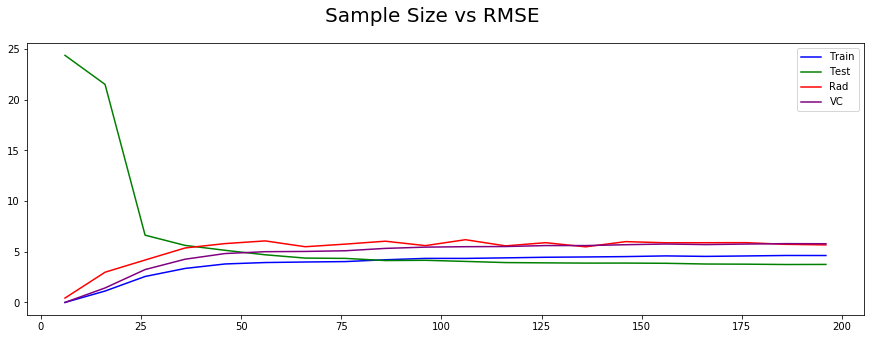

In [4]:
#Step 3: Evaluation

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,5))
fig.suptitle('Sample Size vs RMSE',fontsize=20)
ax.plot(n,train_error,color='blue', label = 'Train')
ax.plot(n,test_error,color = 'green', label = 'Test')
ax.plot(n,radBound.reshape(-1,1), color = 'red', label = 'Rad')
ax.plot(n, VCBound.reshape(-1,1), color = 'purple', label = 'VC')
ax.legend(loc='upper right')
plt.show()



In [10]:
#Step 4: Symbolic Regression (finding closed formula for test error depending only on sample size)
import gplearn as gpl 
from gplearn.genetic import SymbolicRegressor

# Create custom operations (exp) to be considered in the tree
def _xexp( x ):
    a = np.exp(x); 
    a[ np.abs(a) > 1e+9 ] = 1e+9
    return a    

xexp = gpl.functions.make_function( function = _xexp, name='xexp', arity=1 )
f_set = function_set = ['add','mul', 'div', 'log', 'sqrt', 'neg', xexp]

#fitting sumbolic regressor
est_gp = SymbolicRegressor(population_size=1000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                           function_set = f_set)

sample = []
for i in n: 
    sample.append(i)  
sample = np.array([sample])
print(sample)

est_gp.fit(sample.reshape(-1,1),np.dot(1000,test_error))
print(est_gp._program)

[[  6  16  26  36  46  56  66  76  86  96 106 116 126 136 146 156 166 176
  186 196]]
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.73      2.35547e+15        7             3454          12433.8      8.65s
   1    14.01      1.21882e+09       31          3202.85          16400.7      8.50s
   2    16.35      1.60604e+09       28          2570.92          22903.2      8.15s


c:\users\gabi\miniconda3\lib\site-packages\gplearn\functions.py:127: RuntimeWarning: overflow encountered in true_divide
  return np.where(np.abs(x2) > 0.001, np.divide(x1, x2), 1.)


   3    17.13      2.01869e+10       22          2453.01           106786      7.01s
   4    19.01            1e+15       10          1988.21          22786.3      6.25s
   5    20.14      4.03845e+09       17          1965.93          22582.2      5.34s
   6    23.66      3.75933e+09       17          2411.21          22861.4      4.30s
   7    25.71      2.33561e+17       41          2395.36          22878.7      3.06s
   8    29.77      2.26414e+10       33          2006.96          22703.7      1.71s
   9    30.06      1.37183e+10       23          1802.13          13619.3      0.00s
div(div(div(X0, -0.146), log(-0.727)), xexp(log(log(xexp(div(xexp(neg(-0.866)), add(xexp(X0), log(sqrt(xexp(sqrt(0.740)))))))))))


MSE (test_error x symbolic regressor)
3.0750247325177726


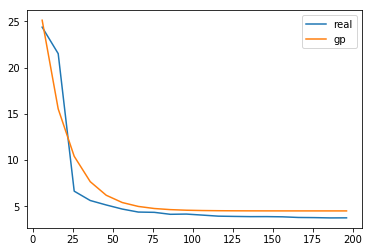

In [14]:
#Step 5: Evaluation for Symbolic Regressor
print("MSE (test_error x symbolic regressor)")
y = ((np.sqrt(np.sqrt(np.sqrt(np.sqrt(np.exp(-sample))))))*30)+4.5
print(mean_squared_error(test_error, y.reshape(-1,1)))

plt.plot(sample.reshape(-1,1),test_error, label = 'real')
plt.plot(sample.reshape(-1,1),y.reshape(-1,1), label = 'gp')
plt.legend(loc='upper right')
plt.show()


### Conclusions experiment 1: 
**Theoretical expectations for Empirical Error Estimation:**
<br>Similar conclusions as in syntethic datasets
<br>**Symbolic Regression Results:**
<br>Similar conclusions as in syntethic datasets. Used same closed-form expression for test error:
$$ (c*\sqrt[16]{e^{-n}}+b) $$

### Experiment 2:  Evaluating how train and test error varies with increasing model capacity
Empirical train and test error: Root Mean Squared Error 
<br>Theoretical Bounds: Rademacher and VC Bounds for Regression 

Hyperparameters: 
<br>Test Samples = 50
<br>Train Samples = 50
<br>Varying model capacity by adding polynomials with degrees = [1,2,3...,10]
<br>Run each polynomial 100 times and take the average for calculating the empirical erros to reduce noise. 


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.datasets import load_boston
from random import sample

samples = 50
n_2 = range(0,100,1)
pw = range(1,11,1)

test_error = []
train_error = []
temp_test = []
temp_train = []
temp_L = []
Rad = []
h = 0

#Test set
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)
X, X_test, Y, Y_test = train_test_split(df_x, df_y, test_size = 0.1)


for i in pw:
    print("polyonomial: " + str(i))
    for j in n_2:
        #step 1 - train set
        idx = sample(range(0,len(X)), samples)
        X_train = X.iloc[idx]
        Y_train = Y.iloc[idx]
     
        Y_pred_train = np.empty_like(Y_train)
        Y_pred_test = np.empty_like(Y_test)
        
        #calculating polinomial features from 1 to 10 degree
        poly = PolynomialFeatures(degree = h+1) 
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)
    
        #rademacher sigma
        s = rademacher_variables(len(Y_train))

        #Step 2: model fitting
        #initialisation of linear regression/insert data for training/prediction
        m = LinearRegression()

        #inserting train data in model for training
        m.fit(X_poly_train,Y_train)

        #predicting values for test data
        Y_pred_test = m.predict(X_poly_test)
        Y_pred_train = m.predict(X_poly_train)

        #computing RMSE
        error_test= np.sqrt(mean_squared_error(Y_test, Y_pred_test))
        temp_test.append(error_test)

        error_train= np.sqrt(mean_squared_error(Y_train, Y_pred_train))
        temp_train.append(error_train)

         #Rademacher constant      
        temp_L.append(float(2*(np.dot(s, np.sqrt((Y_train-Y_pred_train)**2))/len(Y_train))))
    
    test_error.append(sum(temp_test)/len(temp_test))
    train_error.append(sum(temp_train)/len(temp_train))
    Rad.append((max(temp_L)))
    temp_test.clear()
    temp_train.clear()
    temp_L.clear()
    h += 1

#Calculating Rademacher and VC Bounds
print("Rademacher Constant")
print(Rad)
radBound = rademacher_bound((np.array(samples))*np.ones(len(pw)), 0.1, np.array(train_error), np.array(Rad))
print("Rademacher Bound")
print(radBound)
VCdim = vc_dimension_regression((np.array(samples))*np.ones(len(pw)), np.array(Rad))
print("VC Dimension")
print(VCdim)
VCBound = VC_bound((np.array(samples))*np.ones(len(pw)), np.array(train_error), VCdim, 0.1)
print("VC Bound")
print(VCBound)

polyonomial: 1
polyonomial: 2
polyonomial: 3
polyonomial: 4
polyonomial: 5
polyonomial: 6
polyonomial: 7
polyonomial: 8
polyonomial: 9
polyonomial: 10
Rademacher Constant
[2.632845303633294, 5.692868398909923e-13, 5.941558356425958e-13, 4.734346248369547e-13, 5.186286955449759e-12, 1.7056933643289085e-12, 1.1959500056946127e-11, 1.7700862997571677e-11, 3.406217530255162e-11, 6.793356988055165e-11]
Rademacher Bound
[6.47961206 0.05192455 0.05192455 0.05192455 0.05192455 0.05192455
 0.05192455 0.05192455 0.05192455 0.05192455]
VC Dimension
[4.42985278e+01 2.07109918e-24 2.25600128e-24 1.43238130e-24
 1.71890428e-22 1.85926172e-23 9.14038858e-22 2.00229236e-21
 7.41452558e-21 2.94922212e-20]
VC Bound
[4.84271938e+00 1.04614482e-12 5.77908945e-13 1.19288238e-12
 2.13001185e-12 3.21387370e-12 8.77279766e-12 1.75663771e-11
 3.40422312e-11 7.05230362e-11]


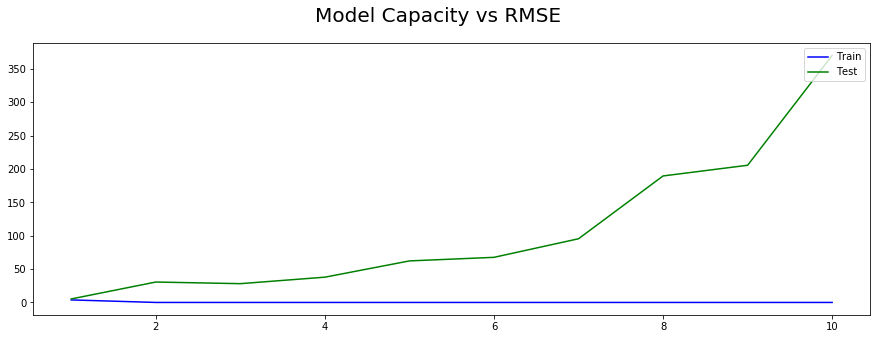

In [34]:
#Step 3: Evaluation

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,5))
fig.suptitle('Model Capacity vs RMSE',fontsize=20)
ax.plot(pw,train_error,color='blue', label = 'Train')
ax.plot(pw,test_error,color = 'green', label = 'Test')
#ax.plot(pw,radBound.reshape(-1,1), color = 'red', label = 'Rad')
#ax.plot(pw, VCBound.reshape(-1,1), color = 'purple', label = 'VC')
ax.legend(loc='upper right')
plt.show()



In [25]:
#Step 4: Symbolic Regression
import gplearn as gpl        
from gplearn.genetic import SymbolicRegressor

# Create custom operations (exp) to be considered in the tree
def xexp( x ):
    a = np.exp(x); 
    a[ np.abs(a) > 1e+9 ] = 1e+9
    return a 

xexp = gpl.functions.make_function( function = _xexp, name='xexp', arity=1 )
f_set = function_set = ['add','mul', 'div', 'log', 'sqrt', 'neg', xexp]
est_gp = SymbolicRegressor(population_size=1000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.2, random_state=0,
                           function_set = f_set)

power = []
for i in pw: 
    power.append(i)  
print(power)
power = np.array([power])
print(test_error)
est_gp.fit(power.reshape(-1,1), test_error)
print(est_gp._program)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[5.237617870589397, 30.58765309144479, 28.14835556393036, 37.861024609077894, 62.235993667182456, 67.59173893204269, 95.42992676029482, 189.55104272571955, 205.55618256353537, 370.2586524518254]
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.73      6.44569e+09       16          22.9813          0.64851      8.76s
   1    11.89      8.53835e+07       16          16.2266          119.574      8.12s
   2    14.76      1.26394e+08       14          12.3873          113.587      8.12s
   3    13.35      3.38223e+07       14          12.3873          113.587      8.25s
   4    11.14       1.1507e+07       19          12.4434          113.082      6.62s
   5    10.36      9.51395e+06       18          12.8057           112.06      6.01s
   6    10.11     

560.4413683969801


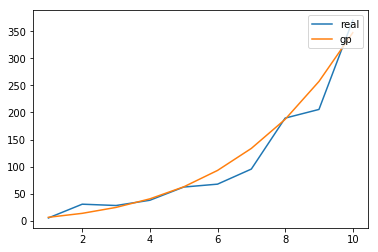

In [33]:
#Step 5: Evaluation for Symbolic Regressor
#y = np.sqrt(np.exp(power)/0.151) #first run
y = np.exp(np.sqrt(power)*1.85)
print(mean_squared_error(test_error, y.reshape(-1,1)))
plt.plot(power.reshape(-1,1),test_error, label = 'real')
plt.plot(power.reshape(-1,1),y.reshape(-1,1), label = 'gp')
plt.legend(loc='upper right')
plt.show()

### Conclusions experiment 2: 

**Theoretical expectations for Empirical Error Estimation:**
<br>Train error curve should decrease until irreducible error. (ok)
<br>Test error curve should present U-shape (error decreses and then increases with model capacity.The more capacity the lower the bias; the less the bias the better the ability to fit data well, which increases variance).The U-shape is not observed, test error only increases as more polynomials are added. 
<br>Theoretical bounds do not approximate test error as well as in the experiments with increasing sample size. The Rademacher Constant and the VC Dimension should capture the depedency of the error with respect to model capacity, but these constants consistently underestimated test error in the experiments. They do not follow the theoretical U-shape and are much more biased towards train error. 

**Symbolic Regression Results:**
<br>Symbolic regression finds a mathematical equation that relates model capacity and test error. 
<br> $$ (e^{sqrt(pw)*c}) $$


Where c is a constant and pw is model capacity.


## Experiment 3:  Evaluating how train and test error varies by changing model capacity and sample size at the same time
Empirical train and test error: Root Mean Squared Error 
<br>Theoretical Bounds: Rademacher and VC Bounds for Regression 

Hyperparameters: 
<br>Test Samples = 25
<br>Train Samples = [4,8,12...48]
<br>Varying model capacity by adding polynomials with degrees = [1,2,3...,6]
<br>Run each polynomial 50 times and take the average for calculating the empirical erros to reduce noise. 

In [90]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from random import sample
import pandas as pd
import numpy as np

n = range(4,50, 4)
n_2 = range(0,100,1)
pw = range(1,7,1)
test_error = np.zeros([len(pw),len(n)])
train_error = np.zeros([len(pw),len(n)])
Rad = np.zeros([len(pw),len(n)])
temp = []
temp2= []
temp_train = []
temp2_train = []
temp_L = []
temp_L2 = []


#Test set
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)
X, X_test, Y, Y_test = train_test_split(df_x, df_y, test_size = 0.05)


for counter,value in enumerate(n): 
    print("Samples: ", str(value))
    for i in pw:
        print("power: ", str(i))
        for j in n_2:   
            #step 1 - train set
            idx = sample(range(0,len(X)), value)
            X_train = X.iloc[idx]
            Y_train = Y.iloc[idx]

            Y_pred_train = np.empty_like(Y_train)
            Y_pred_test = np.empty_like(Y_test)

            #creating polynomialfeatures
            poly = PolynomialFeatures(degree = i) 
            X_train_poly = poly.fit_transform(X_train) 
            X_test_poly = poly.fit_transform(X_test) 

            #rademacher sigma
            s = rademacher_variables(len(Y_train))
            
            #step 2 - model training
            #initialisation of linear regression 
            m = LinearRegression()

            #inserting train data in model for training
            m.fit(X_train_poly,Y_train)

            #predicting values for test data
            Y_pred = m.predict(X_test_poly)
            Y_pred_train = m.predict(X_train_poly)

            #computing RMSE for train and test
            error = np.sqrt(mean_squared_error(Y_test, Y_pred))
            temp.append(error) 
            error_train = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
            temp_train.append(error_train)
            
            #computing Rademacher constant
            L = (2*np.dot(s, np.sqrt((Y_train-Y_pred_train)**2)))/len(Y_train)
            temp_L.append(L)


        temp2.append(sum(temp) / len(temp))
        temp2_train.append(sum(temp_train)/len(temp_train))
        temp_L2.append(max(temp_L))
        temp.clear()
        temp_train.clear()
        temp_L.clear()
    test_error[:,counter] = temp2
    train_error[:,counter] = temp2_train
    Rad[:,counter] = temp_L2
    temp2.clear()
    temp2_train.clear()
    temp_L2.clear()

#Calculating Rademacher and VC Bounds
print("Rademacher Constant")
print(Rad)
radBound = np.zeros([len(pw),len(n)])
c =3*(np.sqrt(np.log(2/0.1))/(2*(np.array(n))))
for i in range(0,len(pw)):
    radBound[i] = np.add(train_error[i], Rad[i])
    radBound[i] = np.add(radBound[i],c)
print("Rademacher Bound")
print(radBound)

VCdim = np.zeros([len(pw),len(n)])
a = np.array(n)/(2*np.log(np.array(n)))
for i in range(0, len(pw)):
    VCdim[i] = (Rad[i]**2)*a
print("VC Dimension")
print(VCdim)

VCbound = np.zeros([len(pw),len(n)])
a = VCdim/np.array(n) #VC/#samples
b = np.log(np.array(n)/VCdim)
b = np.where(b > 0, b, 10**(-8))
c = np.log(0.1/4)
for i in range(0,len(pw)):
    VCbound[i] = train_error[i]/abs((1-0.1*np.sqrt(a[i]+a[i]*b[i]-c)))
print("VC Bound")
print(VCBound)

Samples:  4
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  8
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  12
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  16
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  20
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  24
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  28
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  32
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  36
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  40
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  44
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Samples:  48
power:  1
power:  2
power:  3
power:  4
power:  5
power:  6
Rademacher Constant
[[4.79616347e-14 7.10542736e-14 1.09186734e-12 1.06644100e+00
  1.60561874e+00 2.25993104e+00 1.50629592e+

Min RMSE:  7.296627192542026
Position of min RMSE:  (array([0], dtype=int64), array([9], dtype=int64))
[1, 2, 3, 4, 5, 6]
[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]

Min RMSE for each polynomial 
[ 7.29662719 23.44709814 29.36036897 47.63611933 55.79445539 83.12456117]


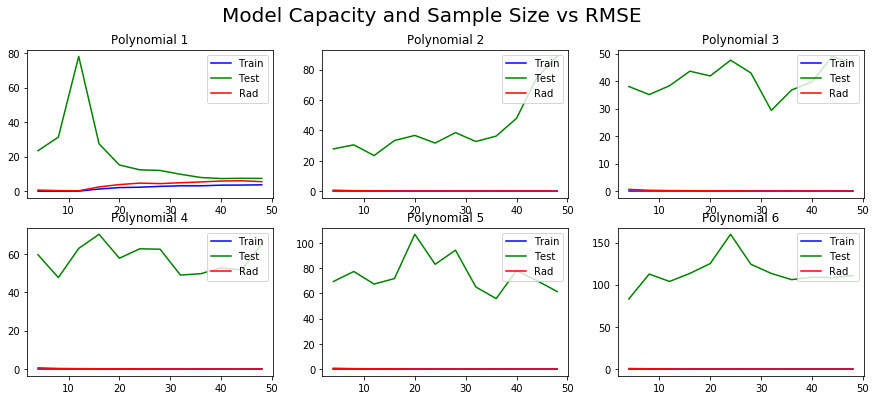

In [114]:
#Step 3: evaluation
import matplotlib.pyplot as plt

print("Min RMSE: ", np.amin(test_error))
pos = np.where(test_error== np.amin(test_error))
print('Position of min RMSE: ', pos)
print(list(pw))
print(list(n))

print('\nMin RMSE for each polynomial ')
print(np.amin(test_error, axis = 1))


#plotting
fig, axs = plt.subplots(2,3, figsize=(15, 6))
fig.suptitle('Model Capacity and Sample Size vs RMSE',fontsize=20)
axs = axs.flatten()
for i in pw:
    axs[i-1].plot(n, train_error[i-1,:], color = 'blue', label = 'Train')
    axs[i-1].plot(n, test_error[i-1,:], color = 'green', label = 'Test')
    axs[i-1].plot(n, radBound[i-1], color = 'red', label = 'Rad')
    #axs[i-1].plot(n,VCBound[i-1], color = 'purple', label = 'VC')
    axs[i-1].legend(loc='upper right')
    axs[i-1].set_title("Polynomial %d" %i)
plt.show()

In [124]:
#Step 4: Symbolic Regression
import gplearn as gpl        
from gplearn.genetic import SymbolicRegressor

# Create custom operations (exp) to be considered in the tree
def xexp( x ):
    a = np.exp(x); 
    a[ np.abs(a) > 1e+9 ] = 1e+9
    return a 

xexp = gpl.functions.make_function( function = _xexp, name='xexp', arity=1 )
f_set = function_set = ['add','mul', 'div', 'log', 'sqrt', 'neg', xexp]
est_gp = SymbolicRegressor(population_size=5000, metric = 'rmse',
                           generations=50, stopping_criteria=1000,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=10, random_state=0,
                           function_set = f_set)
power = []
samples = []
for i in pw: 
    power.append(i)  
for i in n: 
    samples.append(i)  

a = np.transpose([ np.repeat(samples, len(power)), np.tile(power, len(samples))])
error = np.array(list(test_error.flatten()))
est_gp.fit(a,100*error)
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.93      3.67082e+24       44          2194.46          3428.59      1.81m
   1     8.88      1.83021e+09       45          2245.98          3124.72      1.95m
   2    15.11      9.08684e+09       49          1890.81          4638.69      2.16m
   3    21.80      1.52462e+14       35          1762.37             1989      2.65m
   4    31.25      1.52473e+14       35          1617.68          2805.07      2.83m
   5    26.85      2.77312e+16       41          1511.88          3242.98      2.72m
   6    28.37      7.86936e+10       35          1310.37          3889.49      2.83m


c:\users\gabi\miniconda3\lib\site-packages\gplearn\functions.py:127: RuntimeWarning: overflow encountered in true_divide
  return np.where(np.abs(x2) > 0.001, np.divide(x1, x2), 1.)


   7    30.72      1.13971e+11       43          1385.59          3675.22      3.22m
   8    28.24      4.67755e+12       27          1293.97          3872.44      3.37m
   9    26.14      5.05466e+11       34          1301.38          3880.91      2.94m
  10    24.11      2.23321e+11       31          1276.67          3984.22      2.97m
  11    22.11       1.6174e+11       26          1353.26          3779.36      2.47m
  12    20.73      1.98855e+11       26          1361.86          3756.09      2.34m
  13    18.64      1.88501e+14       16          1362.49          3727.18      2.46m
  14    17.20      2.21063e+11       13          1380.59          4352.63      2.32m
  15    16.43      2.65882e+11       14          1357.46          3742.15      2.09m
  16    15.56      2.43405e+11       23           1412.2          3599.07      1.89m
  17    15.33      2.54023e+11       14             1373          3731.38      1.81m
  18    15.22       2.5811e+11       29          1371.43         

MSE (test_error x symbolic regressor)
335.2992404509628


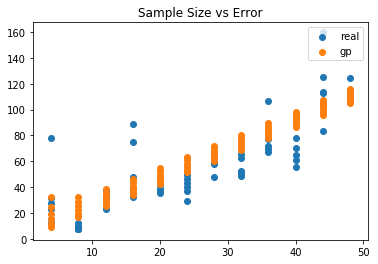

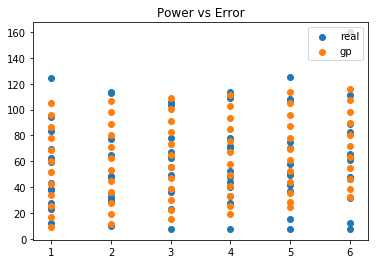

In [138]:
#Step 5: Evaluation for Symbolic Regressor
y = ((np.log(np.log((a[:,0]/0.01))) * (a[:,0]/0.01)) * np.exp(a[:,1]/a[:,0]))/100

print("MSE (test_error x symbolic regressor)")
print(mean_squared_error(error, y.reshape(-1,1)))

plt.title("Sample Size vs Error")
plt.scatter(a[:,0],error, label = 'real')
plt.scatter(a[:,0],y.reshape(-1,1), label = 'gp')
plt.legend(loc='upper right')
plt.show()
plt.title("Power vs Error")
plt.scatter(a[:,1],error, label = 'real')
plt.scatter(a[:,1],y.reshape(-1,1), label = 'gp')
plt.legend(loc='upper right')
plt.show()

### Conclusions experiment 3: 
**Empirical Error Estimation Results:**
<br>For Multivariate regression and this dataset, the best results were found when power = 1 trained with 40 samples. Once polynomial of degree >= 3 are added, the model overfits.
<br>As in all other experiments, once model capacity is added the theoretical bounds do not approximate test_error well. 

**Symbolic Regression Results:**
<br>Symbolic regression finds a mathematical equation that relates model capacity and test error. 
<br> $$ (log(log(n/c))* n/c) *e^{pw/n} $$

Where n is the number the sample size, pw is the model capacity and c is a constant. 